In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

In [2]:
spectra = pd.read_csv('OD0.5IT1000AV3_33/170_Subt10_001.txt', sep='\t', skiprows=13, names=['Wavelength', 'Intensity'])


In [3]:
spectra

,Wavelength,Intensity
0,397.569,-5.85
1,397.701,-5.85
2,397.833,-5.85
3,397.966,-2.85
4,398.098,-11.51
...,...,...
3643,848.895,-9.18
3644,849.009,-9.85
3645,849.123,1.15
3646,849.237,0.15


In [4]:
spectra['Wavelength'].min(),spectra['Wavelength'].max()

(397.569, 849.351)

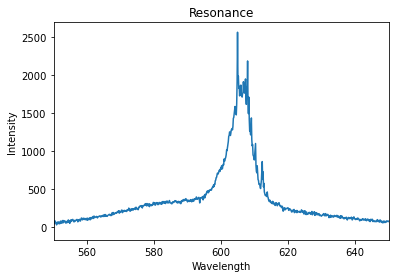

In [5]:
plt.plot(spectra['Wavelength'], spectra['Intensity'])
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Resonance')
plt.xlim(550,650)
plt.show()

In [6]:
spectra.describe()

,Wavelength,Intensity
count,3648.000000,3648.000000
mean,629.011398,78.409704
std,130.633650,235.009554
min,397.569000,-41.850000
25%,516.537000,-4.850000
50%,631.789500,5.490000
75%,742.876750,39.150000
max,849.351000,2559.490000


In [7]:
normAmp=spectra["Intensity"]/spectra["Intensity"].max()

In [8]:
normAmp.describe()

count    3648.000000
mean        0.030635
std         0.091819
min        -0.016351
25%        -0.001895
50%         0.002145
75%         0.015296
max         1.000000
Name: Intensity, dtype: float64

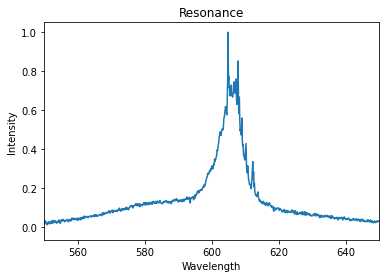

In [9]:
plt.plot(spectra['Wavelength'], normAmp)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Resonance')
plt.xlim(550,650)
plt.show()

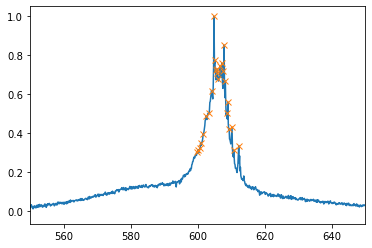

In [12]:
#y = df["Intensity"]
#x = df["Wavelength"]
peaks, _ = find_peaks(normAmp, height=0.3)
#encuentra los picos en el eje nombrado como intensidad a partir de un humbral.
plt.plot(spectra["Wavelength"], normAmp)
plt.plot(spectra["Wavelength"][peaks], normAmp[peaks], "x")
#Estas dos secuencias de plt.plots gráfican respectivamente el espectro y la id de los picos
plt.xlim(550,650)
#plt.plot(np.zeros_like(df["Intensity"]), "--", color="gray")
plt.show()


In [13]:
peaks, _

(array([1568, 1570, 1574, 1576, 1582, 1589, 1595, 1602, 1608, 1610, 1612,
        1614, 1616, 1618, 1622, 1627, 1630, 1632, 1635, 1638, 1641, 1644,
        1651, 1655, 1667]),
 {'peak_heights': array([0.30259544, 0.31327335, 0.32173988, 0.3484366 , 0.39480131,
         0.48739788, 0.50484667, 0.61815049, 1.        , 0.77365022,
         0.72272992, 0.70827391, 0.72846153, 0.6751931 , 0.74526175,
         0.75984669, 0.71947536, 0.85231433, 0.66659764, 0.50289315,
         0.5592872 , 0.42254121, 0.42801105, 0.31314442, 0.33502377])})

In [14]:
diff = np.diff(spectra["Wavelength"][peaks])

In [15]:
diff

array([0.251, 0.502, 0.251, 0.752, 0.878, 0.752, 0.877, 0.752, 0.25 ,
       0.251, 0.25 , 0.251, 0.25 , 0.501, 0.626, 0.376, 0.25 , 0.375,
       0.376, 0.375, 0.375, 0.876, 0.5  , 1.5  ])

In [16]:
freq, bin= np.histogram(diff)

Text(0.5, 1.0, 'Histogram')

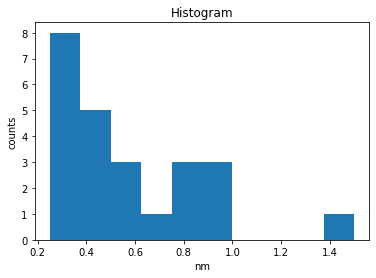

In [17]:
plt.hist(diff,bins=bin)
plt.xlabel('nm')
plt.ylabel('counts')
plt.title('Histogram')

In [18]:
#Para instalar la librerias de peakutils, el signo ! es por que lo hacemos desde Jupyter
#la libreria peakutils contiene el análisis para baseline
!pip install peakutils

In [19]:
import peakutils
from scipy import sparse

In [20]:
#Aplicando el baseline con un algoritmo de base  1-lineal a mi gráfica normAmp
base = peakutils.baseline (normAmp, 1)

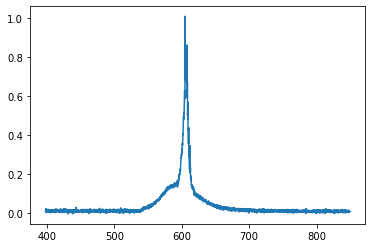

In [21]:
plt.plot(spectra["Wavelength"], normAmp-base)

In [22]:
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [23]:
base = baseline_als(normAmp, 1e3, 0.003, 4)
plt.plot(spectra['Wavelength'], normAmp)
plt.plot(spectra["Wavelength"], base)
#plt.plot(spectra["Wavelength"], normAmp-base)
plt.xlim(550,680)

NameError: name 'spsolve' is not defined

In [24]:
import sys
print (sys.version)

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]


(580.0, 630.0)

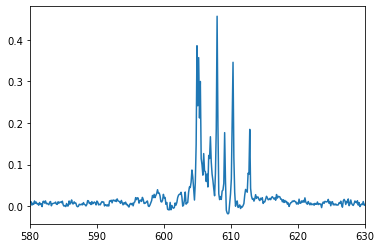

In [383]:
plt.plot(spectra["Wavelength"], normAmp-base)
plt.xlim(580,630)

In [276]:
return max(spectra[peaks])

SyntaxError: 'return' outside function (479948305.py, line 1)

In [179]:
normAmp[peaks]

1753    0.213084
1755    0.229895
1757    0.202617
1763    0.276119
1765    0.285826
1770    0.393418
1776    0.660002
1780    0.312227
1784    0.582874
1791    0.269951
1796    0.249952
1805    0.399617
1809    0.447156
1814    0.261384
1816    0.264162
1822    0.231123
1824    0.218581
1828    0.577554
1832    0.869544
1841    0.649243
1843    0.935854
1845    0.697718
1848    0.678567
1850    0.899893
1854    0.698508
1856    1.000000
1861    0.427976
1869    0.509431
1893    0.532821
Name: Intensity, dtype: float64

In [181]:
spectra['Intensity'][peaks]

1753     2429.38
1755     2621.05
1757     2310.05
1763     3148.05
1765     3258.72
1770     4485.38
1776     7524.72
1780     3559.72
1784     6645.38
1791     3077.72
1796     2849.72
1805     4556.05
1809     5098.05
1814     2980.05
1816     3011.72
1822     2635.05
1824     2492.05
1828     6584.72
1832     9913.72
1841     7402.05
1843    10669.72
1845     7954.72
1848     7736.38
1850    10259.72
1854     7963.72
1856    11401.05
1861     4879.38
1869     5808.05
1893     6074.72
Name: Intensity, dtype: float64